#Problem 1 — Social Network Friend Suggestion (BFS / DFS)

In [1]:
from collections import deque, defaultdict

def build_adj_list(edges):
    g = defaultdict(set)
    for u, v in edges:
        g[u].add(v)
        g[v].add(u)
    return g

def suggest_friends_bfs(adj, user, max_depth=2):
    """Return friends-of-friends for `user` not already directly connected.
       Uses BFS up to depth `max_depth` (2 = friends-of-friends)."""
    visited = set([user])
    q = deque([(user, 0)])
    suggestions = set()
    while q:
        node, depth = q.popleft()
        if depth == max_depth:
            continue
        for nei in adj[node]:
            if nei not in visited:
                visited.add(nei)
                q.append((nei, depth+1))

    dist = {user:0}
    q = deque([user])
    while q:
        curr = q.popleft()
        for nei in adj[curr]:
            if nei not in dist:
                dist[nei] = dist[curr] + 1
                q.append(nei)
    for node, d in dist.items():
        if d == 2 and node not in adj[user]:
            suggestions.add(node)
    return sorted(suggestions)

Sample Usage

In [2]:
edges = [("A","B"),("A","C"),("B","D"),("C","E"),("D","F"),("E","F"),("G","H"),("F","I")]
adj = build_adj_list(edges)
print("Adjacency:", dict(adj))
print("Suggestions for A:", suggest_friends_bfs(adj, "A"))
print("Suggestions for B:", suggest_friends_bfs(adj, "B"))

Adjacency: {'A': {'C', 'B'}, 'B': {'A', 'D'}, 'C': {'A', 'E'}, 'D': {'F', 'B'}, 'E': {'C', 'F'}, 'F': {'E', 'I', 'D'}, 'G': {'H'}, 'H': {'G'}, 'I': {'F'}}
Suggestions for A: ['D', 'E']
Suggestions for B: ['C', 'F']


Complexity: BFS O(V + E).

Scalability: Use adjacency lists and limit BFS depth; for huge social graphs, use heuristics or sampling

#Problem 2 — Route Finding (Bellman-Ford)

In [3]:
def bellman_ford(vertices, edges, src):
    # vertices: list of vertex ids
    # edges: list of tuples (u, v, w)
    INF = float('inf')
    dist = {v: INF for v in vertices}
    dist[src] = 0
    # relax edges V-1 times
    for _ in range(len(vertices) - 1):
        updated = False
        for u, v, w in edges:
            if dist[u] != INF and dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                updated = True
        if not updated:
            break
    # check negative cycle
    neg_cycle = False
    for u, v, w in edges:
        if dist[u] != INF and dist[u] + w < dist[v]:
            neg_cycle = True
            break
    return dist, neg_cycle

Sample Usage

In [4]:
vertices = ["S","A","B","C","D"]
edges = [
    ("S","A", 4), ("S","B", 2),
    ("A","C", 3), ("B","A", 1), ("B","C", -2),
    ("C","D", 2), ("D","B", -6)  # this introduces a negative cycle B->C->D->B
]
dist, neg_cycle = bellman_ford(vertices, edges, "S")
print("Distances:", dist)
print("Negative cycle detected:", neg_cycle)

Distances: {'S': 0, 'A': -15, 'B': -22, 'C': -18, 'D': -16}
Negative cycle detected: True


Complexity: O(V * E).

Explain negative cycles and how to handle in routing (flag and report to user).

#Problem 3 — Emergency Response (Dijkstra)

In [6]:
import heapq

def dijkstra(vertices, adj, src):
    # adj: dict {u: [(v, w), ...], ...}
    INF = float('inf')
    dist = {v: INF for v in vertices}
    dist[src] = 0
    parent = {v: None for v in vertices}
    pq = [(0, src)]
    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v, w in adj.get(u, []):
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                parent[v] = u
                heapq.heappush(pq, (dist[v], v))
    return dist, parent

Sample Usage

In [7]:
vertices = ["S","A","B","C","D"]
adj = {
    "S":[("A",4),("B",2)],
    "A":[("C",3)],
    "B":[("A",1),("C",5)],
    "C":[("D",2)],
    "D":[]
}
dist, parent = dijkstra(vertices, adj, "S")
print("Distances:", dist)
print("Parents:", parent)

def reconstruct_path(parent, target):
    path = []
    while target is not None:
        path.append(target)
        target = parent[target]
    return path[::-1]

print("Path S->D:", reconstruct_path(parent, "D"))

Distances: {'S': 0, 'A': 3, 'B': 2, 'C': 6, 'D': 8}
Parents: {'S': None, 'A': 'B', 'B': 'S', 'C': 'A', 'D': 'C'}
Path S->D: ['S', 'B', 'A', 'C', 'D']


Complexity O(E log V) with min-heap.

Unsuitable for negative edges.

#Problem 4 — Network Cable Installation (Prim’s or Kruskal’s)

In [8]:

def find(parent, x):
    while parent[x] != x:
        parent[x] = parent[parent[x]]
        x = parent[x]
    return x

def union(parent, rank, x, y):
    xroot = find(parent, x)
    yroot = find(parent, y)
    if xroot == yroot:
        return False
    if rank[xroot] < rank[yroot]:
        parent[xroot] = yroot
    elif rank[yroot] < rank[xroot]:
        parent[yroot] = xroot
    else:
        parent[yroot] = xroot
        rank[xroot] += 1
    return True

def kruskal_mst(vertices, edges):
    # edges: list of (w, u, v)
    parent = {v: v for v in vertices}
    rank = {v: 0 for v in vertices}
    mst = []
    total_cost = 0
    edges_sorted = sorted(edges, key=lambda x: x[0])
    for w, u, v in edges_sorted:
        if union(parent, rank, u, v):
            mst.append((u, v, w))
            total_cost += w
    return total_cost, mst


Sample Usage

In [9]:

vertices = ["A","B","C","D","E"]
edges = [
    (1,"A","B"), (3,"A","C"), (3,"B","C"),
    (6,"B","D"), (4,"C","D"), (2,"C","E"), (5,"D","E")
]
cost, mst = kruskal_mst(vertices, edges)
print("MST cost:", cost)
print("MST edges:", mst)

MST cost: 10
MST edges: [('A', 'B', 1), ('C', 'E', 2), ('A', 'C', 3), ('C', 'D', 4)]


Prim vs Kruskal: both O(E log V) typically; Prim favored when graph dense and using adjacency; Kruskal simple with edges list + union-find.

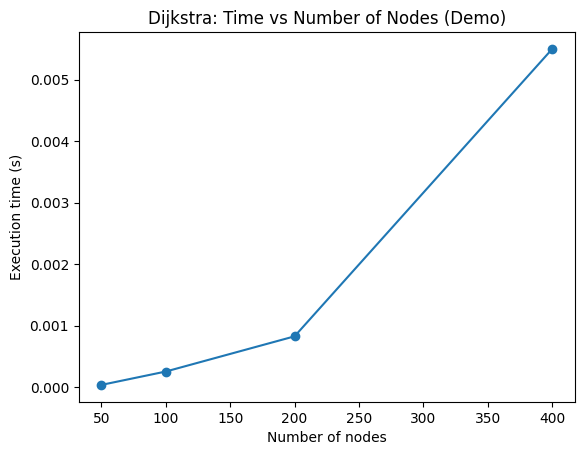

In [18]:
import random
import matplotlib.pyplot as plt

def random_graph(n, p=0.2, max_w=10):
    vertices = [f"v{i}" for i in range(n)]
    adj = {v: [] for v in vertices}
    for i in range(n):
        for j in range(n):
            if i != j and random.random() < p:
                adj[f"v{i}"].append((f"v{j}", random.randint(1, max_w)))
    return vertices, adj

nodes_list = [50, 100, 200, 400]
times = []

for n in nodes_list:
    verts, adj_rand = random_graph(n, p=0.03)
    _, t = measure_time(dijkstra, verts, adj_rand, "v0")  # ✅ now measure_time is defined
    times.append(t)

plt.plot(nodes_list, times, marker='o')
plt.xlabel("Number of nodes")
plt.ylabel("Execution time (s)")
plt.title("Dijkstra: Time vs Number of Nodes (Demo)")
plt.show()
